<a href="https://colab.research.google.com/github/ecbaile/pnt_exercises/blob/main/pnt_exercises_sect1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 1: Introduction to Number Theory and Probabilistic Number Theory**

# Ex 0: Draw a large number of data points from a distribution and plot the resulting histogram

In [1]:
# Pull in some useful packages
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def create_data(data_size):
  '''
  This function takes in
    'n', an integer giving the size of the sample set requested, and
    'dist', an option string indicating which of one of the popular standard (1-d)distributions we want to draw from.  Options are:
        'b': Bernoulli(1/2)
        'e': Exponential(1)
        'g': Geometric(1/2)
        'n': Standard Normal (default)
        'p': Poisson(1)
        'u': Uniform([0,1]) (continuous)
  and returns a list of n draws from the requested distribution.
  '''
  print('Please enter one of the following distributions.  Type')
  print('"b" for Bernoulli(1/2)')
  print('"e" for Exponential(1)')
  print('"g" for Geometric(1/2)')
  print('"n" for Normal(0,1)')
  print('"p" for Poisson(1)')
  print('"u" for Uniform([0,1])')

  dist = input("Enter a choice: ")

  distributions = {
        'b': lambda sz: np.random.binomial(1, 0.5, sz),
        'e': lambda sz: np.random.standard_exponential(sz),
        'g': lambda sz: np.random.geometric(0.5, sz),
        'n': lambda sz: np.random.standard_normal(sz),
        'p': lambda sz: np.random.poisson(1, sz),
        'u': lambda sz: np.random.uniform(0, 1, sz)
    }
  if dist in distributions:
    data = distributions[dist](data_size)
  else:
    raise ValueError("Distribution input must be one of b, e, g, n, p, u.")

  return data

You can run the above function as `create_data(1000)' for example to create a data set of size 100, where the function will ask you to choose from one of the popular distributions:

In [35]:
data = create_data(1000)

Please enter one of the following distributions.  Type
"b" for Bernoulli(1/2)
"e" for Exponential(1)
"g" for Geometric(1/2)
"n" for Normal(0,1)
"p" for Poisson(1)
"u" for Uniform([0,1])
Enter a choice: g


We can plot the data:

In [62]:
def plot_histogram(data, bins=10):
    plt.hist(data, bins=bins, edgecolor='black')
    plt.title('Histogram of Data')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

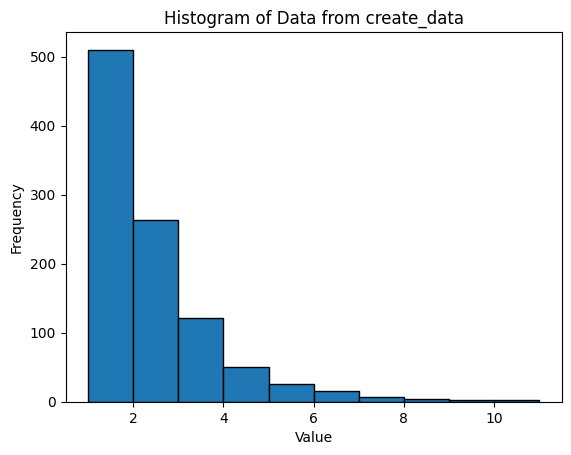

In [37]:
plot_histogram(data)
# The above uses the previously defined variable 'data', and the default number of bins, 10.

# Ex 1: Draw a large number of values of $\zeta(1/2 + i \tau)$, where $\tau$ is a uniform random variable on $[T, 2T]$ for some large(ish) value of $T$:\

In [57]:
import mpmath # Has pre-built functionality for zeta

T = 10**8

def get_rnd_zeta_values(sz, T):
  '''
  Returns a list of length sz of values of \zeta(1/2 + i tau) for
  tau ~ Unif([T, 2T])
  '''
  rnd_heights = np.random.uniform(T, 2*T, sz)
  zeta_vals = []
  for t in rnd_heights:
    # We have to create complex multiprecision numbers in order to evaluate zeta at them.  We want 1/2 + i t for t an element of rnd_heights
    s = mpmath.mpc(0.5, t)
    zeta_vals.append(mpmath.zeta(s))
  return zeta_vals

'''
Now, for reasons that we will see, we want to plot Re(log(zeta(1/2 + i t))), for each of the random zeta values.
'''
def get_re_log_zeta(zeta_data):
  '''
  Given zeta_data, a list of multiprecision values of zeta, returns the real part of the (complex) logarithm of each value.
  Notice this is the same as the log of the absolute value.
  '''
  return [float(mpmath.log(abs(z))) for z in zeta_data]

Let's plot! (Creating the zeta_data this way is a little slow, so have patience using larger sample sizes.)

In [68]:
zeta_data = get_rnd_zeta_values(5000,T)

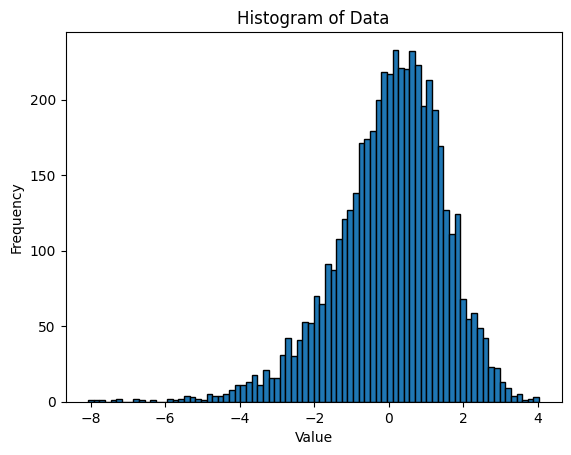

In [71]:
log_zeta_data = get_re_log_zeta(zeta_data)

plot_histogram(log_zeta_data, bins=80)